In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Maximum Tangential Stress Theory

\begin{align*} 
\sigma_{\theta\theta} 
& = \frac{1}{\sqrt{2 \pi r}}\left( K_I \left( \cos^3 \frac{\theta}{2} \right) - K_{II}\left(3 \sin \frac{\theta}{2} \cos^2 \frac{\theta}{2} \right) \right) + T \sin^2 \theta + O(r^\frac{1}{2}) + \ldots \label{eq:sigtt} \tag{1}
\end{align*}
\begin{align*}
\frac{\partial \sigma_{\theta\theta}}{\partial \theta}=0 \label{eq:Con2} \tag{2}
\end{align*}

The maximum tangential theory states that crack propagates in the direction of maximum tangent stress which is calculated as shown in \ref{eq:sigtt} whereas the direction of initiation can be found from the condition depicted in equation \ref{eq:Con2}. However, the latter one yields following result:

\begin{equation*}
[K_I \sin \theta + K_{II}(3 \cos \theta -1)]-\gamma \sin \frac{\theta}{2} \cos \theta = 0
\label{eq:conditionresult} \tag{3}
\end{equation*}

where,

\begin{equation*}
\gamma = \frac{16 \left(T \sqrt{2 \pi r_c}\right)}{3}
\label{eq:thetao} \tag{4}
\end{equation*}

If critical radius ($r_c$) from the tip of the crack is represented in the dimensionless form $\alpha$ as:

\begin{equation*}
\alpha =  \sqrt{\frac{2  r_c}{a}}
\label{eq:alpha} \tag{5}
\end{equation*}

then $\gamma$ can be written in terms of B as:

\begin{equation*}
\gamma=   \frac{16 (B \alpha K_{eff})}{3}
\label{eq:gamma} \tag{6}
\end{equation*}

$K_{eff}$ is given as:
\begin{equation*}
K_{eff} = \sqrt{K_I^2 + K_{II}^2}
\label{eq:Keff} \tag{7}
\end{equation*}

The term $B$ in equation 6 denotes the biaxiality ratio which normalizes the effect of T stress in relation to the stress intensity factors and is given as follows for mixed mode case:
\begin{equation*}
B = \frac{T \sqrt{ \pi a}}{K_{eff}}
\label{eq:B} \tag{8}
\end{equation*}

Here, $a$ represents the crack length. The crack initiation angle is denoted by $\theta$ and $K_I$ and $K_{II}$ denotes the mode I and mode II stress intensity factors.

In [2]:
K_I = sp.Symbol(r'K_I', real = True )
K_II = sp.Symbol(r'K_II', real = True )
K_eff = sp.Symbol(r'K_eff', real = True )
T = sp.Symbol('T', real = True )
a = sp.Symbol('a', real = True )
#gamma = sp.Symbol(r'\gamma', real = True)
B = sp.Symbol(r'B', real = True)
r_c = sp.Symbol(r'r_c', real = True)
alpha = sp.Symbol(r'\alpha', real = True)
theta = sp.Symbol(r'\theta', real = True)
a = sp.Symbol('a', real = True)
Balpha = sp.Symbol(r'B\alpha', nonnegative=True)
Balpha

B\alpha

In [3]:
x = (3 * sp.cos(theta) - 1)/sp.sin(theta)
y = (8/3) * Balpha * sp.cos(theta)/sp.cos(theta/2)
y

2.66666666666667*B\alpha*cos(\theta)/cos(\theta/2)

In [4]:
z = K_II / K_I
z

K_II/K_I

In [5]:
#x = sp.Symbol('x', real = True)
#y = sp.Symbol('y', real = True)
z = (-x-(y*sp.sqrt(x**2-y**2+1)))/(x**2-y**2)
z

(-7.11111111111111*B\alpha*sqrt(-B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + 0.140625*(3*cos(\theta) - 1)**2/sin(\theta)**2 + 0.140625)*cos(\theta)/cos(\theta/2) - (3*cos(\theta) - 1)/sin(\theta))/(-7.11111111111111*B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + (3*cos(\theta) - 1)**2/sin(\theta)**2)

In [6]:
#Mixity Parameter
l = 1/z
M_e = (2/sp.pi) * sp.atan(1/z)
M_e

2*atan((-7.11111111111111*B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + (3*cos(\theta) - 1)**2/sin(\theta)**2)/(-7.11111111111111*B\alpha*sqrt(-B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + 0.140625*(3*cos(\theta) - 1)**2/sin(\theta)**2 + 0.140625)*cos(\theta)/cos(\theta/2) - (3*cos(\theta) - 1)/sin(\theta)))/pi

In [7]:
material_params = {
 Balpha: 0.375,
    K_Ic : 31.4
}

In [8]:
get_z = sp.lambdify(theta, z.subs(material_params), 'numpy')
z.subs(material_params)

(-(3*cos(\theta) - 1)/sin(\theta) - 1.0*sqrt((3*cos(\theta) - 1)**2/sin(\theta)**2 + 1 - cos(\theta)**2/cos(\theta/2)**2)*cos(\theta)/cos(\theta/2))/((3*cos(\theta) - 1)**2/sin(\theta)**2 - 1.0*cos(\theta)**2/cos(\theta/2)**2)

In [9]:
get_x = sp.lambdify(theta, x.subs(material_params), 'numpy')
x.subs(material_params)

(3*cos(\theta) - 1)/sin(\theta)

In [10]:
get_y = sp.lambdify(theta, y.subs(material_params), 'numpy')
y.subs(material_params)

1.0*cos(\theta)/cos(\theta/2)

In [11]:
get_M_e = sp.lambdify(theta, M_e.subs(material_params), 'numpy')
M_e.subs(material_params)

2*atan(((3*cos(\theta) - 1)**2/sin(\theta)**2 - 1.0*cos(\theta)**2/cos(\theta/2)**2)/(-(3*cos(\theta) - 1)/sin(\theta) - 1.0*sqrt((3*cos(\theta) - 1)**2/sin(\theta)**2 + 1 - cos(\theta)**2/cos(\theta/2)**2)*cos(\theta)/cos(\theta/2)))/pi

In [12]:
def get_response(theta_m=-15*np.pi/180, n_steps=4): #,n_steps=4
    x_record, y_record, z_record, M_e_record = [], [], [], []
    theta_o = np.linspace(-90*np.pi/180,theta_m,n_steps+1)
    for the in theta_o:
        x = get_x(the)
        y = get_y(the)
        z = get_z(the)
        Me = get_M_e(the)
        #print(Me)
        x_record.append(x)
        y_record.append(y)
        z_record.append(z)
        M_e_record.append(Me)
        #print(theta_o*180/np.pi)
        #print('x',x)
        #print('y',y)
        #print('z',z)
    #plt.plot(Me, theta_o*180/np.pi)
    return (
        theta_o, np.array(x_record,dtype=np.float_),
        np.array(y_record,dtype=np.float_),
        np.array(z_record, dtype=np.float_),
        np.array(M_e_record,dtype=np.float_)
    )

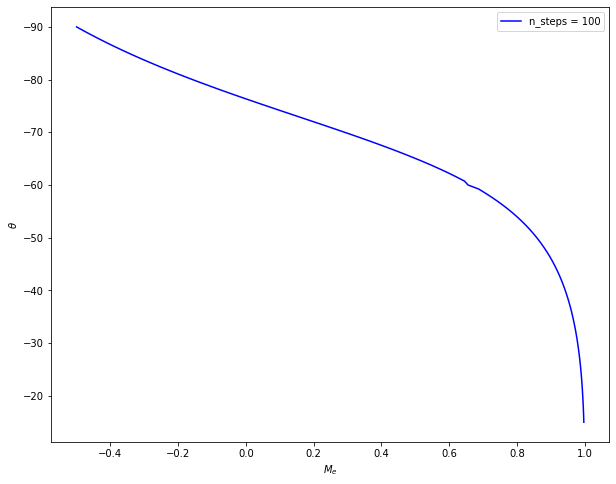

In [13]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(10,8))
colors = ['blue','red', 'green', 'black', 'magenta', 'pink']
n_step_range = np.arange(1,2)*100
theta_m = -15*np.pi/180
#print(theta * 180/np.pi)
for n_step, color in zip(n_step_range, colors):
    theta_o, x_arr, y_arr, z_arr, M_e_arr = get_response(theta_m,n_step) 
    ax1.plot(M_e_arr[:], theta_o*180/np.pi, color=color, 
         label='n_steps = %g' % n_step)
    ax1.set_xlabel('$M_e$'); ax1.set_ylabel(r'$\theta$')
    ax1.invert_yaxis()
    ax1.legend()
    #print(M_e_arr)
    #print(theta_o*180/np.pi)

In [14]:
sigma = sp.Symbol(r'\sigma', real = True)
beta = sp.Symbol(r'\beta', real = True)
K_I = sigma*sp.sqrt(sp.pi*a)*(sp.sin(beta))**2
K_II = sigma*sp.sqrt(sp.pi*a)*sp.sin(beta)*sp.cos(beta)
T = sigma*sp.cos(2*beta)
B = sp.cos(2*beta)/sp.sin(beta)
K_I_n = K_I/ (sigma * sp.sqrt( sp.pi * a))
K_II_n = K_II / (sigma*sp.sqrt(sp.pi*a))
K_I

sqrt(pi)*\sigma*sqrt(a)*sin(\beta)**2

In [15]:
params = {sigma:1, a:1}

In [16]:
get_K_I_n= sp.lambdify(beta, K_I_n, 'numpy')
K_I_n

sin(\beta)**2

In [17]:
get_K_II_n= sp.lambdify(beta, K_II_n, 'numpy')
K_II_n

sin(\beta)*cos(\beta)

In [18]:
get_K_I = sp.lambdify(beta, K_I.subs(params), 'numpy')
K_I.subs(params)

sqrt(pi)*sin(\beta)**2

In [19]:
get_K_II = sp.lambdify(beta, K_II.subs(params), 'numpy')
K_II.subs(params)

sqrt(pi)*sin(\beta)*cos(\beta)

In [20]:
get_T = sp.lambdify(beta, T.subs(params), 'numpy')
T.subs(params)

cos(2*\beta)

In [21]:
T_n = sigma*sp.cos(2*beta)/sigma
get_T_n = sp.lambdify(beta, T_n, 'numpy')
T_n

cos(2*\beta)

In [22]:
get_B = sp.lambdify(beta, B, 'numpy')
B

cos(2*\beta)/sin(\beta)

In [23]:
K_eff = sp.sqrt(K_I**2 + K_II**2)
get_K_eff = sp.lambdify(beta, K_eff.subs(params),'numpy')
K_eff.subs(params)

sqrt(pi*sin(\beta)**4 + pi*sin(\beta)**2*cos(\beta)**2)

In [24]:
K_eff_n = sp.sqrt(K_I_n**2 + K_II_n**2)
get_K_eff_n = sp.lambdify(beta, K_eff_n,'numpy')
K_eff_n

sqrt(sin(\beta)**4 + sin(\beta)**2*cos(\beta)**2)

In [25]:
def get_response(beta=90*np.pi/180, n_steps=8): #,n_steps=4
    K_I_rec, K_II_rec, T_rec, K_eff_rec = [], [], [], []
    beta_o = np.linspace(0,beta,n_steps+1)
    for be in beta_o:
        K_I_n = get_K_I_n(be)
        K_II_n = get_K_II_n(be)
        T_n = get_T_n(be)
        K_eff_n = get_K_eff_n(be)
        K_I_rec.append(K_I_n)
        K_II_rec.append(K_II_n)
        T_rec.append(T_n)
        K_eff_rec.append(K_eff_n)
        #print(K_I_n)
        #print(be)
    return (
        beta_o, np.array(K_I_rec,dtype=np.float_),
        np.array(K_II_rec,dtype=np.float_),
        np.array(T_rec, dtype=np.float_),
        np.array(K_eff_rec, dtype=np.float_)
    )

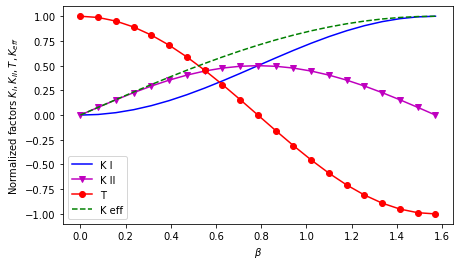

In [26]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
colors = ['blue','red', 'green', 'black', 'magenta', 'pink']
n_step_range = np.arange(1,2)*20
beta = 90*np.pi/180
#print(theta * 180/np.pi)
for n_step, color in zip(n_step_range, colors):
    beta_o, K_I_arr, K_II_arr, T_arr, K_eff_arr = get_response(beta,n_step) 
    ax1.plot(beta_o, K_I_arr[:], color=color, 
         label='K I')
    ax1.plot(beta_o, K_II_arr[:], 'm-v', 
         label='K II')
    ax1.plot(beta_o, T_arr[:], 'r-o', 
         label='T')
    ax1.plot(beta_o, K_eff_arr[:], 'g--', 
         label='K eff')
    ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel('Normalized factors $K_I, K_{II}, T, K_{eff}$')
    ax1.legend()
    #print(K_I_arr)
    #print(theta_o*180/np.pi)

In [43]:
c = -3 *sp.tan(theta/2)
e = -4 * Balpha * sp.tan(theta/2) * sp.sin(theta/2)
z = (-x-(y*sp.sqrt(x**2-y**2+1)))/(x**2-y**2)
#z = sp.Symbol('z', real = True)
#c = sp.Symbol('c', real = True)
#e = sp.Symbol('e', real = True)
K_I_f = 1/((sp.cos(theta/2))**3* (1 + c*z -e* sp.sqrt(1+z**2)))
K_II_f = z/((sp.cos(theta/2))**3* (1 + c*z -e* sp.sqrt(1+z**2)))
K_II_f

(-7.11111111111111*B\alpha*sqrt(-B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + 0.140625*(3*cos(\theta) - 1)**2/sin(\theta)**2 + 0.140625)*cos(\theta)/cos(\theta/2) - (3*cos(\theta) - 1)/sin(\theta))/((-7.11111111111111*B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + (3*cos(\theta) - 1)**2/sin(\theta)**2)*(4.0*B\alpha*sqrt(1.0 + (-B\alpha*sqrt(-B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + 0.140625*(3*cos(\theta) - 1)**2/sin(\theta)**2 + 0.140625)*cos(\theta)/cos(\theta/2) - 0.140625*(3*cos(\theta) - 1)/sin(\theta))**2/(-B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + 0.140625*(3*cos(\theta) - 1)**2/sin(\theta)**2)**2)*sin(\theta/2)*tan(\theta/2) + 1 - 3*(-7.11111111111111*B\alpha*sqrt(-B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + 0.140625*(3*cos(\theta) - 1)**2/sin(\theta)**2 + 0.140625)*cos(\theta)/cos(\theta/2) - (3*cos(\theta) - 1)/sin(\theta))*tan(\theta/2)/(-7.11111111111111*B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + (3*cos(\theta) - 1)**2/sin(\theta)**2))*cos(\theta/2)**3)

In [49]:
K_Ic = sp.Symbol(r'K_{Ic}', real = True)
Norm_K_I_ = K_I/ K_Ic
Norm_K_I_

sqrt(pi)*\sigma*sqrt(a)*sin(\beta)**2/K_{Ic}

In [50]:
Norm_K_II_ = K_II/K_Ic
Norm_K_II_

sqrt(pi)*\sigma*sqrt(a)*sin(\beta)*cos(\beta)/K_{Ic}

In [44]:
get_K_I_f = sp.lambdify(theta, K_I_f.subs(material_params), 'numpy')
K_I_f.subs(material_params)

1/((1.5*sqrt(1.0*(-(3*cos(\theta) - 1)/sin(\theta) - sqrt((3*cos(\theta) - 1)**2/sin(\theta)**2 + 1 - cos(\theta)**2/cos(\theta/2)**2)*cos(\theta)/cos(\theta/2))**2/((3*cos(\theta) - 1)**2/sin(\theta)**2 - cos(\theta)**2/cos(\theta/2)**2)**2 + 1.0)*sin(\theta/2)*tan(\theta/2) - 3*(-(3*cos(\theta) - 1)/sin(\theta) - 1.0*sqrt((3*cos(\theta) - 1)**2/sin(\theta)**2 + 1 - cos(\theta)**2/cos(\theta/2)**2)*cos(\theta)/cos(\theta/2))*tan(\theta/2)/((3*cos(\theta) - 1)**2/sin(\theta)**2 - 1.0*cos(\theta)**2/cos(\theta/2)**2) + 1)*cos(\theta/2)**3)

In [45]:
get_K_II_f = sp.lambdify(theta, K_II_f.subs(material_params), 'numpy')
K_II_f.subs(material_params)

(-(3*cos(\theta) - 1)/sin(\theta) - 1.0*sqrt((3*cos(\theta) - 1)**2/sin(\theta)**2 + 1 - cos(\theta)**2/cos(\theta/2)**2)*cos(\theta)/cos(\theta/2))/(((3*cos(\theta) - 1)**2/sin(\theta)**2 - 1.0*cos(\theta)**2/cos(\theta/2)**2)*(1.5*sqrt(1.0*(-(3*cos(\theta) - 1)/sin(\theta) - sqrt((3*cos(\theta) - 1)**2/sin(\theta)**2 + 1 - cos(\theta)**2/cos(\theta/2)**2)*cos(\theta)/cos(\theta/2))**2/((3*cos(\theta) - 1)**2/sin(\theta)**2 - cos(\theta)**2/cos(\theta/2)**2)**2 + 1.0)*sin(\theta/2)*tan(\theta/2) - 3*(-(3*cos(\theta) - 1)/sin(\theta) - 1.0*sqrt((3*cos(\theta) - 1)**2/sin(\theta)**2 + 1 - cos(\theta)**2/cos(\theta/2)**2)*cos(\theta)/cos(\theta/2))*tan(\theta/2)/((3*cos(\theta) - 1)**2/sin(\theta)**2 - 1.0*cos(\theta)**2/cos(\theta/2)**2) + 1)*cos(\theta/2)**3)

In [46]:
def get_response(theta_m=-15*np.pi/180, n_steps=8): #,n_steps=4
    K_I_f_rec, K_II_f_rec = [], []
    theta_o = np.linspace(-90*np.pi/180,theta_m,n_steps+1)
    for the in theta_o:
        K_I_f = get_K_I_f(the)
        K_II_f = get_K_II_f(the)
        K_I_f_rec.append(K_I_f)
        K_II_f_rec.append(K_II_f)
    return (
        beta_o, np.array(K_I_f_rec,dtype=np.float_),
        np.array(K_II_f_rec,dtype=np.float_)
    )

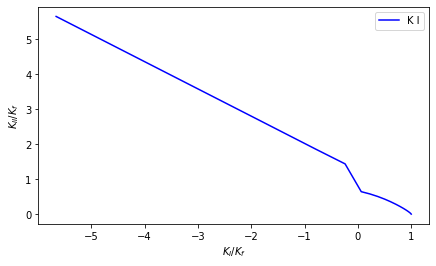

In [47]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
colors = ['blue','red', 'green', 'black', 'magenta', 'pink']
n_step_range = np.arange(1,2)*20
theta_m = -15*np.pi/180
#print(theta * 180/np.pi)
for n_step, color in zip(n_step_range, colors):
    theta_o, K_I_f_arr, K_II_f_arr = get_response(theta_m,n_step) 
    ax1.plot(K_I_f_arr, K_II_f_arr, color=color, 
         label='K I')
    ax1.set_xlabel(r'$K_I/K_f$'); ax1.set_ylabel(r'$K_{II}/K_f$')
    ax1.legend()
    #print(K_I_arr)
    #print(theta_o*180/np.pi)

In [53]:
z = (-x-(y*sp.sqrt(x**2-y**2+1)))/(x**2-y**2)
eq1 = (x**2-y**2)*z**2 + 2*x*z + (1 - y**2)
nle = sp.Eq(eq1,0)
nle

Eq(-7.11111111111111*B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + 1.0*(-7.11111111111111*B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + (3*cos(\theta) - 1)**2/sin(\theta)**2)*(-B\alpha*sqrt(-B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + 0.140625*(3*cos(\theta) - 1)**2/sin(\theta)**2 + 0.140625)*cos(\theta)/cos(\theta/2) - 0.140625*(3*cos(\theta) - 1)/sin(\theta))**2/(-B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + 0.140625*(3*cos(\theta) - 1)**2/sin(\theta)**2)**2 + 1 + 2*(-7.11111111111111*B\alpha*sqrt(-B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + 0.140625*(3*cos(\theta) - 1)**2/sin(\theta)**2 + 0.140625)*cos(\theta)/cos(\theta/2) - (3*cos(\theta) - 1)/sin(\theta))*(3*cos(\theta) - 1)/((-7.11111111111111*B\alpha**2*cos(\theta)**2/cos(\theta/2)**2 + (3*cos(\theta) - 1)**2/sin(\theta)**2)*sin(\theta)), 0)

In [54]:
sol = sp.solve(eq1, theta) #, exclude = [Balpha]
sol

[]